In [4]:
# imPORT LIBRARIES 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [5]:
# CONFIGURATIONS
#help(handcalcs.set_option)
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)
#handcalcs.set_option("line_break", "\\\\[20pt]")
#handcalcs.set_option("param_columns", 1)

#handcalcs.set_option("math_environment_start", "aligned")
#handcalcs.set_option("math_environment_end", "aligned")
#handcalcs.set_option("line_break", r"<br>")
#handcalcs.set_option("line_break", r"\\")

In [6]:
from localcode2 import *
fig_counter=1

# Resonance Tank Capacitor and Output Capacitor  <a class="title_class" id="title_1"></a>

## Inputs and claculated parameters  <a class="title_class" id="title_2"></a>

In [7]:
with open("../01_llc_tank/04_outputs/inp_datas.json", "r", encoding="utf-8") as f:
    inp_datas = json.load(f)
#print("Input datas:")
#print("="*20)
#display(inp_datas)
S= pd.Series(inp_datas, name = "Input datas").to_frame()
#display(S)
#print(inp_datas)
with open("../01_llc_tank/04_outputs/out_results.json", "r", encoding="utf-8") as f:
    out_datas = json.load(f)
#print("Output datas:")
#print("="*20)
#display(out_datas)

S= pd.Series(out_datas, name = "Output datas").to_frame()
#display(S)
#print("\n")
#print(out_datas)


# Load variables 
for key, value in inp_datas.items():
    globals()[key] = value
for key, value in out_datas.items():
    globals()[key] = value

In [8]:
import math 
def dic_show(out_datas, nb_cols = 3):
    keys = list(out_datas.keys())
    values = list(out_datas.values())
    
    # Compute number of rows needed
    Nbindex = math.ceil(len(keys) / nb_cols)
    
    # Prepare a dictionary for DataFrame
    data_dict = {}
    for i in range(nb_cols):
        # Slice keys and values for this column
        col_keys = keys[i*Nbindex:(i+1)*Nbindex]
        col_values = values[i*Nbindex:(i+1)*Nbindex]
        
        # Pad with empty strings if necessary
        while len(col_keys) < Nbindex:
            col_keys.append("")
            col_values.append("")
        
        # Add two columns per logical column: "Name" and "Value"
        data_dict[f"Name_{i+1}"] = col_keys
        data_dict[f"Value_{i+1}"] = col_values
    
    # Create DataFrame
    df = pd.DataFrame(data_dict)
    print(df.to_string(index=False, header=False))


In [9]:
dic_show(inp_datas, 4)
print("\n")
dic_show(out_datas, 4)

V_In_min 360.0 V_In_max 400.0 Vo_nom 48.0 Power   1200.0
V_In_nom 380.0   Vo_min  42.0 Vo_max 54.0 f_nom 100000.0


  Lnc   3.000   Lm_uH     65.392     Ioe_rms  7.636 Re_110    22.637
  Qec   0.550 fsw_min  60170.000     Ios_rms 30.545     Cr       0.0
Cr_nF 116.209 fsw_max 156220.000      Ir_rms 10.354     Lr  0.000022
    n   4.000  Im_rms      6.992 L_second_uH  4.087     Lm  0.000065
Lr_uH  21.797      Io     25.000      Re_nom 24.901                 


## Output capacitor Co  <a class="title_class" id="title_3"></a>

### Formulas  <a class="title_class" id="title_4"></a>

**Basic sizing (capacitive ripple only)**
$C_o \ge C_{o_{min}}$

$C_{o_{min}} = \dfrac{I_o}{8\,f_{sw}\,\Delta V_{outC}}$

$\Delta V_{outC} = \dfrac{I_o}{8\,f_{sw}\,C_o}$


Where:

- $C_o$ : Output capacitance (Farads, F)  
- $I_o$ : Output load current (Amperes, A)  
- $f_{sw}$ : Switching frequency of the converter (Hertz, Hz)  
- $\Delta V_{out}$ : Maximum allowed output voltage ripple (Volts, V)  
- $ESR$ : Equivalent Series Resistance of the capacitor (Ω)
---

**ESR-related terms**
$ESR_{max} = \dfrac{\Delta V_{outR}}{I_{rect\_peak}}$

$\Delta V_{outR} = I_{rect\_peak}\cdot ESR$

Where $I_{rect\_peak} = \dfrac{\pi}{2}\,I_o$

So:  
$\Delta V_{outR} = \dfrac{\pi}{2}\,I_o\cdot ESR$

---

**Capacitor RMS current**
$I_{C_o} = I_o \sqrt{\dfrac{\pi^2}{8} - 1}$



---

**Total ripple — vector (RMS) sum with 90° phase shift**
$\Delta V_{out} = \sqrt{\Delta V_{outC}^2 + \Delta V_{outR}^2}$

$\Delta V_{out} = \sqrt{\left(\dfrac{I_o}{8\,f_{sw}\,C_o}\right)^2 + \left(I_{rect\_peak}\cdot ESR\right)^2}$

Replace $I_{rect\_peak}$:  
$\Delta V_{out} = \sqrt{\left(\dfrac{I_o}{8\,f_{sw}\,C_o}\right)^2 + \left(\dfrac{\pi}{2}\,I_o\cdot ESR\right)^2}$

---

**Solve for $C_o$ (RMS sum)**
$C_o \ge \dfrac{I_o}{8\,f_{sw}\,\sqrt{\Delta V_{out}^2 - \left(\dfrac{\pi}{2}\,I_o\cdot ESR\right)^2}}$  
Condition: $\Delta V_{out} > \dfrac{\pi}{2}\,I_o\cdot ESR$

---

**Solve for $ESR$ (RMS sum)**
$ESR \le \dfrac{1}{\dfrac{\pi}{2}\,I_o} \sqrt{\Delta V_{out}^2 - \left(\dfrac{I_o}{8\,f_{sw}\,C_o}\right)^2}$

---

**Optional split of ripple budget (50%-50% rule)**
$\Delta V_{outR} < \dfrac{\Delta V_{out,max}}{2}$

$\Delta V_{outC} < \dfrac{\Delta V_{out,max}}{2}$

**Implied bounds with 50/50 split:**  

$C_o \ge \dfrac{I_o}{8\,f_{sw}\,\left(\dfrac{\Delta V_{out,max}}{2}\right)} = \dfrac{I_o}{4\,f_{sw}\,\Delta V_{out,max}}$

$ESR \le \dfrac{\dfrac{\Delta V_{out,max}}{2}}{\dfrac{\pi}{2}\,I_o} = \dfrac{\Delta V_{out,max}}{\pi\,I_o}$


### Numerical Implementation of the Formulas 50% 50%  <a class="title_class" id="title_5"></a>

**We must use fsw_min to the worst case**

In [10]:
%%render long
Io # A
fsw_min # Hz
DV = 0.25 # vpp
Co_min_uF = 1e6*Io/(4*fsw_min*DV ) # uF

<IPython.core.display.Latex object>

In [11]:
%%render long
ESR_max_m = 1e3*DV /(Io*pi) # mΩ 
I_Co= Io*sqrt(pi**2/8-1) # Arms

<IPython.core.display.Latex object>

### First proposition  <a class="title_class" id="title_6"></a>

B40910A8127M000 aluminum electrolytic capacitors with Temp_max = 150°C, Below a screenshoot of the datasheet [\[2\]](#referencesID_03_2).

In [12]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "B40910.png",
    "B40910A8127M000 aluminum electrolytic capacitors with Temp_max = 150°C",
    first_part_path= first_part_path, 
)

Let's start with a configuration of 6 capacitors in parallel, in the worst case ($C_{capa}= C_{min}$ of the datasheet)

In [13]:
%%render 
#4 parallels capascitor
Nb_capa= 6
C_capa_nom = 120 # uF
Margin = 20 #\%
C_capa = C_capa_nom*(1-Margin/100)# uF, Worst case 

<IPython.core.display.Latex object>

In [14]:
%%render 
C_eq = C_capa*Nb_capa # uF > 415uF ok
ESR_capa= 17 # Ω @ 100kHz

ESR_eq = ESR_capa/Nb_capa # Ω < 3.18m OK
Icapa_max = 4.6

<IPython.core.display.Latex object>

In [15]:
%%render long
Ieq_max = Icapa_max *Nb_capa  #  @ Arms @ 125°C 100kHz > 12.08Arms ok

<IPython.core.display.Latex object>

**I_rect_peak**

In [16]:
%%render 
I_rect_peak= Io*pi/2 # A

<IPython.core.display.Latex object>

**Voltage ripples**

In [17]:
%%render 
Delta_V_out =sqrt((Io/(8*fsw_min*C_eq*1e-6))**2+(pi/2*Io*ESR_eq*1e-3)**2) # V < 0.25V Ok 

<IPython.core.display.Latex object>

#### Self heating

**Power Dissipation of Each Capacitor**

In [18]:
%%render long
I_each_capa= I_Co/Nb_capa # A
P_selfHeating = ESR_capa*1e-3*I_each_capa**2 # W

<IPython.core.display.Latex object>

**Estimation of Thermal Resistance Rth**

In [19]:
%%render long
# Estimation or Rth 

# @100Khz and 125°C Iac,R I=4.6A
# 100KHZ 20°C ESR = 0.017 Ohm 
# Max T = 150°C 
Delta_T= 150-125 # °C
ESR = 17e-3
I = 4.6 # Arms
P_dissip= ESR*I**2 # W
R_th = Delta_T/P_dissip # °C/W

<IPython.core.display.Latex object>

**The self heating estimation and the max ambiant temp**

In [20]:
%%render long
# self heating 
Delta_T= P_selfHeating*R_th # °C => low delta temp
Margin = 30 # °C 
T_max = 150
T_amb_max = T_max -Delta_T-Margin  # °C 

<IPython.core.display.Latex object>

**Voltage margin**

In [21]:
%%render long 
Vo_max # VDC
V_max_datasheet = 63 # VDC
Voltage_Margin =  100*(V_max_datasheet-Vo_max) /V_max_datasheet # \%

<IPython.core.display.Latex object>

This solution is acceptable, but the voltage margin is limited.

In [22]:
dic_capa1= {}
for x in "C_capa,ESR_eq,C_eq,Ieq_max,Nb_capa,P_selfHeating,T_amb_max,Voltage_Margin,Delta_V_out".split(","):
    dic_capa1[x]= eval(x)

### Second proposition  <a class="title_class" id="title_7"></a>

EMHS101ARA331MMN0S aluminum electrolytic capacitors with Temp_max = 150°C, Below a screenshoot of the datasheet [\[4\]](#referencesID_03_4).

In [23]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "EMHS.png",
    "EMHS101ARA331MMN0S aluminum electrolytic capacitors with Temp_max = 150°C",
    first_part_path= first_part_path, 
)

Let's start with a configuration of 10 capacitors in parallel, in the worst case ($C_{capa}= C_{min}$ of the datasheet)

In [24]:
%%render 
#4 parallels capascitor
Nb_capa= 10
C_capa_nom = 330 # uF
Margin = 20 #\%
C_capa = C_capa_nom*(1-Margin/100)# uF, Worst case 

<IPython.core.display.Latex object>

In [25]:
%%render 
C_eq = C_capa*Nb_capa # uF > 415uF ok
ESR_capa= 59 # Ω @ 100kHz

ESR_eq = ESR_capa/Nb_capa # Ω > 3.18m NOK


<IPython.core.display.Latex object>

Since the ESR does not satisfy the 50%–50% condition of the formula, we must use the full (unsimplified) expression for the voltage ripple.

In [26]:
%%render 
Icapa_max = 2.3

<IPython.core.display.Latex object>

In [27]:
%%render long
Ieq_max = Icapa_max *Nb_capa  #  @ Arms @ 125°C 100kHz > 12.08Arms ok

<IPython.core.display.Latex object>

**I_rect_peak**

In [28]:
%%render 
I_rect_peak= Io*pi/2 # A

<IPython.core.display.Latex object>

**Voltage ripples**

In [29]:
%%render 
Delta_V_out =sqrt((Io/(8*fsw_min*C_eq*1e-6))**2+(pi/2*Io*ESR_eq*1e-3)**2) # V < 0.25V Ok 

<IPython.core.display.Latex object>

The condition is satisfied, but with a very limited margin.

#### Self heating

**Power Dissipation of Each Capacitor**

In [30]:
%%render 
I_each_capa= I_Co/Nb_capa
P_selfHeating = ESR_capa*1e-3*I_each_capa**2 # W

<IPython.core.display.Latex object>

**Estimation of Thermal Resistance Rth**

In [31]:
%%render 
# Estimation or Rth 

# @100Khz and 125°C Iac,R I=4.6A
# 100KHZ 20°C ESR = 0.017 Ohm 
# Max T = 150°C 
Delta_T= 150-125 # °C
P_dissip= ESR_capa*1e-3*Icapa_max **2 # W
R_th = Delta_T/P_dissip # °C/W

<IPython.core.display.Latex object>

**The self heating estimation and the max ambiant temp**

In [32]:
%%render 
# self heating 
Delta_T= P_selfHeating*R_th # °C => low delta temp
Margin = 30 # °C 
T_max = 150
T_amb_max = T_max -Delta_T-Margin  # °C 

<IPython.core.display.Latex object>

In [33]:
%%render 
Vo_max # VDC
V_max_datasheet = 100 # VDC
Voltage_Margin =  100*(V_max_datasheet-Vo_max) /V_max_datasheet # \%

<IPython.core.display.Latex object>

In [34]:
dic_capa2= {}
for x in "C_capa,ESR_eq,C_eq,Ieq_max,Nb_capa,P_selfHeating,T_amb_max,Voltage_Margin,Delta_V_out".split(","):
    dic_capa2[x]= eval(x)

### Comparaison  <a class="title_class" id="title_8"></a>

In [35]:
dic_capa1["VmaxDC"]=63
dic_capa2["VmaxDC"]=100

In [36]:
requirements= {"ESR_eq":ESR_max_m, "C_eq":Co_min_uF, "Ieq_max":I_Co, 
               "VmaxDC":Vo_max, "Delta_V_out":DV}

In [37]:
pd.DataFrame([requirements, dic_capa1, dic_capa2], 
             index= ["requirements","Solutio1", "Solutio2"]).T.round(2)

,requirements,Solutio1,Solutio2
ESR_eq,3.18,2.83,5.90
C_eq,415.49,576.00,2640.00
Ieq_max,12.09,27.60,23.00
VmaxDC,54.00,63.00,100.00
Delta_V_out,0.25,0.14,0.23
C_capa,NaN,96.00,264.00
Nb_capa,NaN,6.00,10.00
P_selfHeating,NaN,0.07,0.09
T_amb_max,NaN,115.21,113.10
Voltage_Margin,NaN,14.29,46.00


*) The ESR requirement is based on the 50%–50% formula (see above for solution2).

The voltage margin in the first solution is limited (16% in the worst case). Nevertheless, I recommend proceeding with this option due to the number of parallel capacitors. Careful control is required to avoid overshoot or transient voltages, particularly when Vout is at its maximum.

## Input Capacitor Ci

We will use the same formula as the output capacitor above: 

### Numerical Implementation of the Formulas 50% 50%  <a class="title_class" id="title_5"></a>

**We must use fsw_min to the worst case**

In [53]:
%%render 

Ii= Power /V_In_min  # A
fsw_min # Hz
delta_V = 1 # \%
DV = V_In_nom * delta_V /100 # vpp
Ci_min_uF = 1e6*Ii/(4*fsw_min*DV ) # uF

<IPython.core.display.Latex object>

In [54]:
%%render long
ESR_max_m = 1e3*DV /(Ii*pi) # mΩ 
I_Ci= Ii*sqrt(pi**2/8-1) # Arms

<IPython.core.display.Latex object>

### Film Capacitors MKP 1848e 4uF +/-5% 700V (MKP1848E54070JK2)

**Let's start with this capacitor MKP1848E54070JK2**
see the datasheet [\[5\]](#referencesID_03_5).

In [60]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "INPC1.png",
    "Mouser, Film Capacitors MKP 1848e 4uF +/-5% 700V (MKP1848E54070JK2)",
    first_part_path= first_part_path, 
)

In [62]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "INPC8.png",
    "Understund the part number",
    first_part_path= first_part_path, 
)

**Signification of the part number**

In [69]:
inx= ['MKP', '1848E', '5', '40', '70', 'J', 'K', '2']
val = (
    "METALLIZED POLYPROPYLENE, TYPE CONSTRUCTION, MULTIPLIER (nF)=100,"
    " CAPACITANCE 40=4000nF,VOLTAGE UNDC = 70 = 700 VDC at 85 °C,"
    "TOLERANCE J=5%, Pitch code = K  => P1=27.5mm,2 = 2pins"
).split(",")

pd.DataFrame ([val], columns = inx).T.rename( {0:"MKP1848E54070JK2"} , axis = 1)

,a
MKP,METALLIZED POLYPROPYLENE
1848E,TYPE CONSTRUCTION
5,MULTIPLIER (nF)=100
40,CAPACITANCE 40=4000nF
70,VOLTAGE UNDC = 70 = 700 VDC at 85 °C
J,TOLERANCE J=5%
K,Pitch code = K => P1=27.5mm
2,2 = 2pins


In [72]:

fig_counter = One_figure_with_captions(
    fig_counter, 
    "INPC2.png",
    "datasheet MKP1848E54070JK2, ESR= 12.5mOhom @10 kHz, Irms= 5.5A (Maximum RMS current at 10 kHz, +85 °C, Δt = +15 °C)",
    first_part_path= first_part_path, 
)

**Verification**

In [123]:
%%render 

Tolerance = 5 # \%
C_Datasheet = 4 # uF 

Ci_min_uF
C_Min = C_Datasheet  *(1-Tolerance/100) # uF > 3.645 uF




<IPython.core.display.Latex object>

In [125]:
%%render 
ESR_max_m
ESR_Datasheet = 12.5 # mOhm < 362mOhm

<IPython.core.display.Latex object>

In [135]:
%%render long
Delta_V_out =sqrt((Ii/(8*fsw_min*C_Min*1e-6))**2+(pi/2*Ii*ESR_Datasheet*1e-3)**2)  # V
delta_V_out =100*Delta_V_out/V_In_nom  # \% < 1\% Ok 

<IPython.core.display.Latex object>

**Impedance curve**

In [74]:

fig_counter = One_figure_with_captions(
    fig_counter, 
    "INPC3.png",
    "datasheet 700V 4uF, ESR ~ 12mOhm, Fres = 700kHz",
    first_part_path= first_part_path, 
)

**Estimation of the ESL**

In [82]:
%%render 
C= 4 # uF
Fres = 700e3 # Hz
ESL = 1e9/((2*pi*Fres)**2*C*1e-6) # nH

<IPython.core.display.Latex object>

**Expectation life time**

In [85]:
%%render 
U_OPDC=400 # Operation dc voltage 
U_NDC=700 # Nominal dc voltage
k = U_OPDC/U_NDC

<IPython.core.display.Latex object>

In [95]:

fig_counter = One_figure_with_captions(
    fig_counter, 
    "INPC9.png",
    "Life time expectancy (h), k = 0.57, Tamb = 85°C ==> 200 000 h",
    first_part_path= first_part_path, 
)

In [92]:
%%render 
Life_h = 200000 # hours
Life_years= (Life_h/24/365) # Years

<IPython.core.display.Latex object>

**Tamb and current limit**

In [97]:
fig_counter = One_figure_with_captions(
    fig_counter, 
    "INPC7.png",
    "For 105°C curve, and 85°C amb, no limite in the rms current, coef = 1",
    first_part_path= first_part_path, 
)

**The self heating**

From the datasheet

In [101]:
%%render 
ESR=12.5 # mOhm
Icapa_rms = 5.5 # Arms
Delta_T = 15 # °C 

<IPython.core.display.Latex object>

Selg heating 

In [104]:
%%render 
Pd= ESR*1e-3*Icapa_rms **2 # W
Rth = Delta_T/Pd # °C/W

<IPython.core.display.Latex object>

**Maximum permissible ambient temperature in the application**

In [112]:
%%render 
I_Ci # the RMS current in our application
Pd = I_Ci**2 * ESR*1e-3 # W
Delta_T = Rth * Pd  # °C 
T_capaMax = 105 #°C 
Margin = 10 # °C 
T_ambMax = T_capaMax-Delta_T -Margin 

<IPython.core.display.Latex object>

## Resonanat capacitor Cr  <a class="title_class" id="title_9"></a>

### Chosing a capacitor for Cr  <a class="title_class" id="title_10"></a>

**The inputs data**

In [35]:
%%render long
Cr_nF # nF
V_In_max # V
fsw_min # Hz

<IPython.core.display.Latex object>

**The RMS voltage of the resonant capacitor**

In [36]:
%%render long
X_Cr= 1/(2*pi*fsw_min*Cr_nF*1e-9) # Ohm 

<IPython.core.display.Latex object>

In [37]:
%%render
V_Cr= Ir_rms*X_Cr # V
V_Cr_rms= sqrt((V_In_max/2)**2+V_Cr**2) # vrms

<IPython.core.display.Latex object>

In [38]:
# https://www.mouser.es/ProductDetail/EPCOS-TDK/B32672L1333J?qs=vht8qxFUkGz11LfwwLq5EA%3D%3D
# https://product.tdk.com/system/files/dam/doc/product/capacitor/film/mkp_mfp/data_sheet/20/20/db/fc_2009/mkp_b32671l_672l.pdf

Starting with the **B3267*L** film capacitors, the maximum rated DC voltage is 2000 V. [\[2\]](#referencesID_03_3).

In [39]:
B32672L1333 = [6.2, 6.8, 8.2, 10.0, 12.0, 15.0, 22.0, 33.0, 47.0, 56.0, 68.0]
print(f"The design value of Cr is {Cr_nF:.1f} nF")
print("Below are some possible combinations for constructing this resonant capacitor:")
arr= []
for c in B32672L1333: 
    n= round(Cr_nF/c)
    ct= n*c
    error = 100*(ct-Cr_nF)/Cr_nF
    dic = {"Nominal_capa_nF":c, "Nb capas in parallel": n, 
           "total capa nF" :ct, "error %":round(error, 1)}
    arr.append(dic)
pd.DataFrame(arr)

The design value of Cr is 116.2 nF
Below are some possible combinations for constructing this resonant capacitor:


,Nominal_capa_nF,Nb capas in parallel,total capa nF,error %
0,6.2,19,117.8,1.4
1,6.8,17,115.6,-0.5
2,8.2,14,114.8,-1.2
3,10.0,12,120.0,3.3
4,12.0,10,120.0,3.3
5,15.0,8,120.0,3.3
6,22.0,5,110.0,-5.3
7,33.0,4,132.0,13.6
8,47.0,2,94.0,-19.1
9,56.0,2,112.0,-3.6


**The current of each element capacitor**

In [40]:
%%render 
Ir_rms_1=Ir_rms/8

<IPython.core.display.Latex object>

**The 15 nF, 15 mm, 2000 VDC TDK MKP capacitor meets both the Vrms and Irms requirements.**

In [41]:
first_part_path = "./03_figures/"

fig_counter = show_figure_pair_with_captions(
    fig_counter, 
    "CR_VRMS.png",
    "Vrms 15 nF, 15 mm, 2000 VDC TDK MKP",
    "CR_IRMS.png",
    "Irms 15 nF, 15 mm, 2000 VDC TDK MKP", 
    first_part_path= first_part_path, 
)

Below is a screenshot from the B32672L datasheet. The ref **B32672L8153** is a 15 nF capacitor.

In [42]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "capa15nF.png",
    "B32672L8153 is a 15 nF capacitor.",
    first_part_path= first_part_path, 
    width = 12
)

In [43]:
# https://eu.mouser.com/ProductDetail/EPCOS-TDK/B32672L8153J?qs=CsdphVCLJRjPN7YH24ATpg%3D%3D
# https://product.tdk.com/system/files/dam/doc/product/capacitor/film/mkp_mfp/data_sheet/20/20/db/fc_2009/mkp_b32671l_672l.pdf

In [44]:
# B32672L8153 ==> 15n 2000VDC
# DATASHEET
# https://product.tdk.com/system/files/dam/doc/product/capacitor/film/mkp_mfp/data_sheet/20/20/db/fc_2009/mkp_b32671l_672l.pdf

**The ESR and Power dissipation**

In [45]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "CR_ESR.png",
    "ESR and Thermal derating",
    first_part_path= first_part_path, 
    width = 19
)

From the below <br>
6.8nF ESR=70µΩ <br>
33nF ESR=50µΩ <br> 
By linear interpolation, the ESR of a 15 nF capacitor can be estimated as 63.74 µΩ

**The power dissipation of each capacitor**

In [46]:
%%render 
ESR_u= np.interp([15],[6.8,33],[70,50])[0] # µΩ
Ir_rms_1 # Arms
Ir_rms_max = 2 # Arms
PD_uW = ESR_u*Ir_rms_1**2 # uW

<IPython.core.display.Latex object>

**The Rth estimation**

In [47]:
%%render 
T_max = 125
T_100= 100
Delta_T= T_max-T_100
PD_uW_max= ESR_u*Ir_rms_max**2
R_TH = Delta_T/(PD_uW_max) # °C/uW

<IPython.core.display.Latex object>

**Each capacitor's self-heating and the maximum permissible ambient temperature.**

In [48]:
%%render 
Delta_T= PD_uW*R_TH # °C
T_amb_max = 125-Delta_T # °C 

<IPython.core.display.Latex object>

### Understanding the Derating Curve of the Capacitors  <a class="title_class" id="title_11"></a>

**One point calculation**

In [49]:
%%render 
Ta = 105
Delta_T= T_max-Ta
PD_uW_max = Delta_T/R_TH
Ir_rms_max_Ta=sqrt(PD_uW_max/ESR_u)
Fa = Ir_rms_max_Ta/Ir_rms_max

<IPython.core.display.Latex object>

**The same calculation is repeated to construct the derating curve.**

(80.0, 125.0)

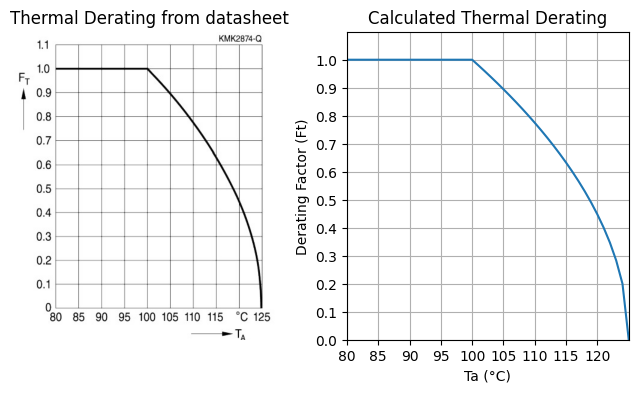

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

img = plt.imread("../01_llc_tank/03_figs/Capa_thermal_derating.jpg")
axes[0].imshow(img)
axes[0].axis("off")
axes[0].set_title("Thermal Derating from datasheet")


Ta_arr= np.arange(80,125+1,1)
Fa_arr=[]
for Ta in Ta_arr:
    if Ta>100:
        Delta_T= T_max-Ta
        PD_uW_max = Delta_T/R_TH
        Ir_rms_max_Ta=sqrt(PD_uW_max/ESR_u)
        Fa = Ir_rms_max_Ta/Ir_rms_max
        Fa_arr.append(Fa)
    else: 
        Fa_arr.append(1)
        
axes[1].plot(Ta_arr, Fa_arr)

axes[1].set_xlabel("Ta (°C)")
axes[1].set_ylabel("Derating Factor (Ft)")
axes[1].set_title("Calculated Thermal Derating")

axes[1].set_xticks(np.arange(80, 125, 5))
axes[1].set_yticks(np.arange(0, 1.1, 0.1))

axes[1].grid(True)
axes[1].set_ylim([0,1.1])
axes[1].set_xlim([80,125])

### Resonant capacitors configuration  <a class="title_class" id="title_12"></a>

There are two possible configurations for the resonant capacitors:

- All capacitors in parallel:

which is the classic LLC configuration and offers simplicity in layout.
- Dividing the capacitors between the high side and low side:

which helps balance HV+ and HV-.

Below is a simulation of both solutions. We can see that the voltage and current of each capacitor are almost identical in both configurations, and all other voltages and currents are also very similar.

You can donwload the LTSPICE file using this <a src =".\02_simulation\03_Res_capacitor\Comparaison_Res_Capas_Archi.asc">Link</a>.

In [51]:
first_part_path = "./03_figures/"

fig_counter = One_figure_with_captions(
    fig_counter, 
    "Comparaison_Res_Capas_Archi.png",
    "Simulation of resonant capacitor configurations",
    first_part_path= first_part_path, 
    width = 18
)

## References   <a class="title_class" id="title_13"></a><a id="referencesID_03_1"></a> 
<a id="referencesID1"></a> [1] Hong Huang, *Designing an LLC Resonant
Half-Bridge Power Converter*. Available: [https://bbs.dianyuan.com/upload/community/2013/12/01/1385867010-65563.pdf](https://bbs.dianyuan.com/upload/community/2013/12/01/1385867010-65563.pdf)
 <br>

<a id="referencesID_03_2"></a> [2] 
[B40910 Aluminum electrolytic capacitors datasheet](https://product.tdk.com/system/files/dam/doc/product/capacitor/aluminum-electrolytic/hybrid-polymer/data_sheet/20/30/db/aec/b40910.pdf)

<a id="referencesID_03_3"></a> [3] 
[B3267*L Film Capacitors](https://product.tdk.com/system/files/dam/doc/product/capacitor/film/mkp_mfp/data_sheet/20/20/db/fc_2009/mkp_b32671l_672l.pdf)


<a id="referencesID_03_4"></a> [4] 
[EMHS Aluminum electrolytic capacitors datasheet](https://www.mouser.fr/datasheet/2/420/Chemi_Con_MHSRA_e-3313675.pdf)



<a id="referencesID_03_5"></a> [5] 
[Film Capacitors MKP 1848e 4uF +/-5% 700V datasheet , MKP1848E54070JK2](https://www.vishay.com/docs/26085/mkp1848edclink.pdf)

